# **Fourier Transformation and Intuition**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Signal Basis**

**Description**: We're going to randomly generate frequencies for signals using numpy and hopefully (fingers crossed) we manage to find these frequency coefficients by utilizing a Fourier-Based Decomposition of Summed up signals 

In [152]:
N = 500 # np.random.randint(low=5, high=200) # Stochastic number of signals to be summed

signal_data = []

for _ in range(N):
    vertical_shift = np.random.randint(-20, 20)
    phase_shift = np.random.randint(0, 30)
    rand_freq = np.random.randint(1, 50)
    rand_amp = np.random.randint(1, 20)
    data = (vertical_shift, phase_shift, rand_freq, rand_amp)

    signal_data.append(data)

signal_data = np.array(signal_data)

print(f"Number of Signals: {N}")

print("Signal Format: (Vertical Shift, Phase Shift, Frequency, Amplitude): [--", end="")
for signal in signal_data:
    print(f"({signal[0]}, {signal[1]}, {signal[2]}, {signal[3]})", end="--")
print("]")

Number of Signals: 500
Signal Format: (Vertical Shift, Phase Shift, Frequency, Amplitude): [--(10, 21, 41, 10)--(4, 18, 2, 2)--(-18, 23, 44, 1)--(18, 22, 20, 12)--(-13, 28, 19, 10)--(14, 9, 46, 16)--(-10, 27, 3, 9)--(2, 1, 39, 18)--(19, 4, 31, 15)--(-17, 17, 13, 3)--(-15, 13, 20, 2)--(-7, 8, 14, 17)--(1, 26, 44, 16)--(9, 25, 45, 6)--(-16, 0, 27, 18)--(-12, 28, 15, 19)--(18, 1, 8, 3)--(-18, 0, 32, 16)--(3, 29, 34, 4)--(7, 19, 32, 2)--(2, 14, 42, 10)--(-16, 25, 12, 14)--(14, 1, 30, 3)--(7, 15, 36, 8)--(-11, 4, 13, 3)--(-20, 1, 30, 13)--(-14, 26, 13, 1)--(11, 0, 21, 9)--(15, 10, 36, 6)--(-15, 15, 38, 13)--(-7, 3, 18, 16)--(-11, 2, 14, 6)--(3, 17, 18, 8)--(-5, 20, 5, 9)--(2, 0, 8, 10)--(12, 17, 43, 11)--(3, 4, 6, 19)--(-17, 14, 25, 9)--(5, 26, 19, 4)--(11, 1, 25, 2)--(-11, 29, 10, 19)--(-18, 24, 19, 9)--(11, 26, 12, 17)--(-11, 14, 28, 6)--(19, 16, 36, 13)--(-18, 13, 49, 16)--(18, 0, 21, 8)--(-16, 12, 45, 8)--(12, 10, 46, 19)--(-9, 13, 42, 12)--(-14, 4, 21, 16)--(-11, 1, 37, 15)--(3, 24, 27

In [153]:
def sinusodial(vertical_shift, phase_shift, freq, amp, data) -> np.array:
    return np.array(vertical_shift + amp * np.sin(2 * np.pi * freq * data + phase_shift)) # Sin signal formula

def sum_signals(signals, start, end, sample_freq) -> list:
    num_signals = len(signals)
    
    summed_signal = np.array([0] * (sample_freq * (end - start)))
    
    steps = np.linspace(start = start, stop = end, num=sample_freq * (end-start))

    for signal in signals:
        ver_shift, phase_shift, freq, amp = signal[0], signal[1], signal[2], signal[3]

        function_data = sinusodial(vertical_shift=ver_shift, phase_shift=phase_shift, freq=freq, amp=amp, data=steps)

        summed_signal = summed_signal + function_data

    return summed_signal

sample_frequency = 100

start_time = 0
end_time = 10

summed_signals = sum_signals(signals=signal_data, start=start_time, end=end_time, sample_freq=sample_frequency)

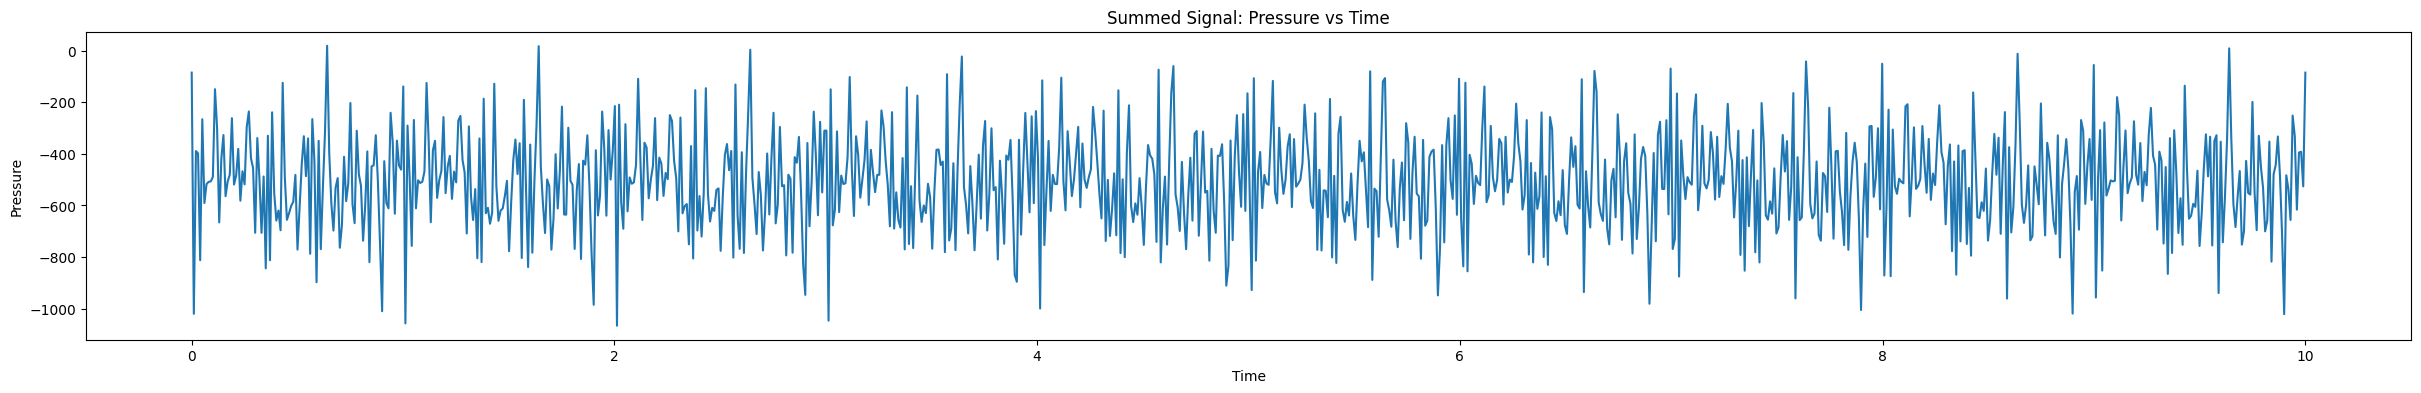

In [154]:
y = summed_signals
x = np.linspace(start=start_time, stop=end_time, num=sample_frequency * (end_time - start_time))
plt.figure(figsize=(30, 4))
plt.title("Summed Signal: Pressure vs Time")
plt.ylabel("Pressure")
plt.xlabel("Time")
plt.plot(x,y)
plt.show()

## **Fourier Transform**

In [155]:
def wrap(summed_data, wrap_freq, time_steps) -> np.float32:
    wrapped_points = summed_data * np.exp(-2 * np.pi * 1j * wrap_freq * time_steps)

    n = len(wrapped_points)
    real_sum = 0
    imag_sum = 0

    for point in wrapped_points:
        real_sum += point.real
        imag_sum += point.imag
    
    # Now you can normalize and take the unit vector, but doesn't really matter ngl

    real_coord_norm = real_sum / n
    imag_coord_norm = imag_sum / n

    mag_diff = np.float32(np.linalg.norm([real_coord_norm, imag_coord_norm]))

    return mag_diff

center_of_mass_mags = []
for wrapping_frequency in np.linspace(start=1, stop=50, num=5000):
    mag_diff = wrap(summed_signals, wrap_freq=wrapping_frequency, time_steps=x)
    center_of_mass_mags.append(mag_diff)

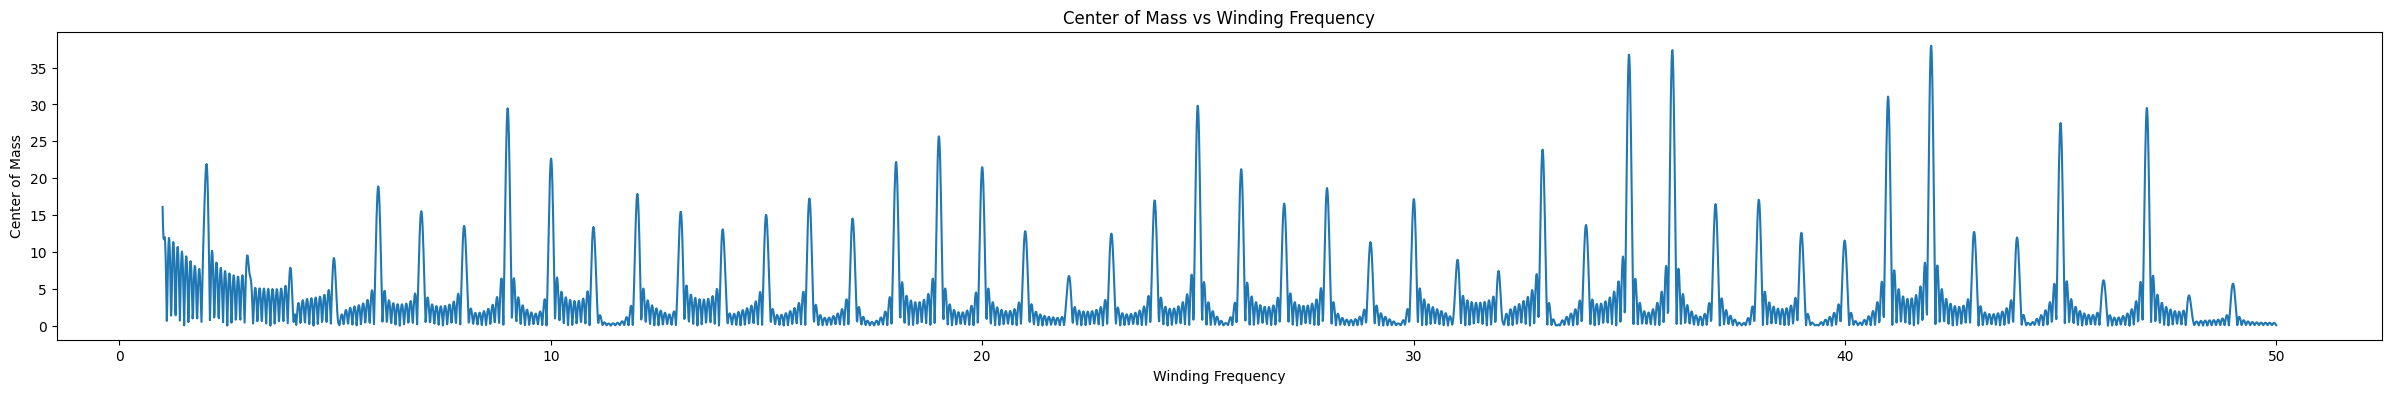

In [156]:
frequencies = np.linspace(start=1, stop=50, num=5000)
center_of_masses = center_of_mass_mags

plt.figure(figsize=(30, 4))
plt.title("Center of Mass vs Winding Frequency")
plt.xlabel("Winding Frequency")
plt.ylabel("Center of Mass")
plt.plot(frequencies, center_of_masses)
plt.show()